# Demo of visualizing iRF interaction prevalence 

In [8]:
import irf
from sklearn.datasets import load_boston, load_breast_cancer
from irf.ensemble import (wrf, 
                          wrf_reg)
from irf.utils import (get_prevalent_interactions, 
                       visualize_impurity_decrease, 
                       visualize_prevalent_interactions)
import numpy as np

### load data

In [2]:
#load_data
data = load_boston()
#data = load_breast_cancer()
X = data['data']
y = data['target']

### traing weighted RF

In [3]:
#train_model
rf = wrf_reg(min_impurity_decrease=0.01)
weight = np.ones((X.shape[1],))
weight = weight / np.sum(weight)
rf.fit(X, y, feature_weight=weight, K = 3, keep_record=False)

wrf_reg(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=None,
        max_features='auto', max_leaf_nodes=None, max_samples=None,
        min_impurity_decrease=0.01, min_impurity_split=None, min_samples_leaf=1,
        min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100,
        n_jobs=None, oob_score=False, random_state=None, verbose=0,
        warm_start=False)

In [4]:
#visualize feature importance of rf
print(rf.feature_importances_)

[3.85900904e-02 5.98901386e-04 3.84326967e-03 4.53470791e-04
 2.47357178e-02 4.59479355e-01 1.27338033e-02 6.71179479e-02
 1.77398924e-03 1.25623613e-02 1.53876247e-02 9.37453685e-03
 3.53348932e-01]


- Observation: feature 5 and 12 are most useful.

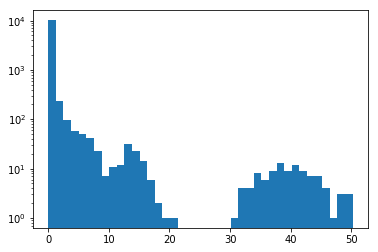

In [5]:
#visualize the impurity decrease distribution at all inner nodes
visualize_impurity_decrease(rf, yscale='log', bins=40)

- Observation: there are two modes, one around 15, the other around 40.

In [6]:
#preprocess compute the prevalence of the rf model
prevalence = get_prevalent_interactions(rf, impurity_decrease_threshold=9, min_support=10, signed=True)

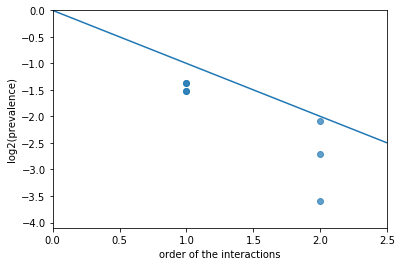

In [9]:
#visualize prevalence of the interactions from signed irf
visualize_prevalent_interactions(prevalence)

- Observation: There is a order-two interaction that is close to the limit.

In [10]:
#visualize interactions sorted by prevalence
sorted(list(prevalence.items()), key= lambda x: -x[1])

[(((5, '-'),), 0.3874999999999994),
 (((5, '+'),), 0.38749999999999896),
 (((12, '+'),), 0.3475000000000013),
 (((12, '-'),), 0.347499999999997),
 (((5, '-'), (12, '-')), 0.23499999999999976),
 (((5, '-'), (12, '+')), 0.15249999999999977),
 (((5, '+'), (12, '-')), 0.08249999999999963)]

- Observation: the interaction (5-, 12-) seems significant. 